In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit


## Different Models

In [5]:
### Parameters

Pmax = 1100
P3 = 445
P6 = 400
P12 = 365

t3 = 60*3
t6 = 60*6
t12 = 60*12

## HYP 2 Model

$$ W_{lim}(t) = W' + CP*t $$

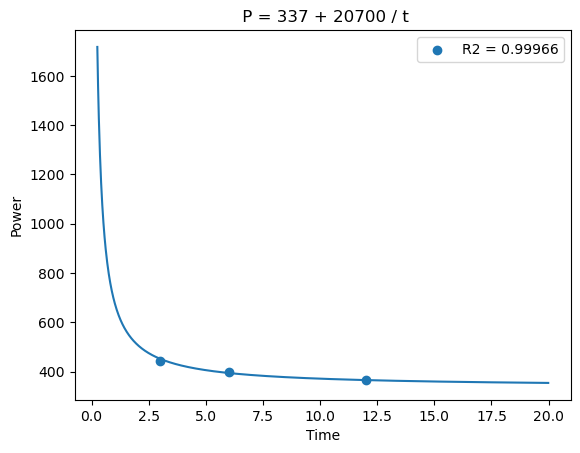

In [100]:
Times = np.array([t3, t6, t12]).reshape(-1, 1) 
Works = np.array([t3*P3, t6*P6, t12*P12])
Powers = np.array([P3, P6, P12])


# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(Times, Works)
W_2 = model.intercept_
CP_2 = model.coef_[0]

### R^2 of this model
predictions = model.predict(Times)
r_squared = r2_score(Works, predictions)

## Recreate the curve
time_array = np.arange(15,20*60)
Power_array = [CP_2+W_2/t for t in time_array]

plt.scatter(Times/60, Powers, label='R2 = '+str(np.round(r_squared,5)))
plt.plot(time_array/60,Power_array)
plt.xlabel('Time')
plt.ylabel('Power')
plt.title(f' P = {CP_2:.0f} + {W_2:.0f} / t')
plt.legend()
plt.show()

## HYP 3 Model

$$ t = \frac{W’}{PO-CP} - \frac{W'}{P_{max}- CP} $$

$$ \Longrightarrow t = \frac{W’}{P-CP} * \frac{P_{max}-P}{P_{max}-CP}$$

Fitted CP: 330.0
Fitted W_prime: 26833.0


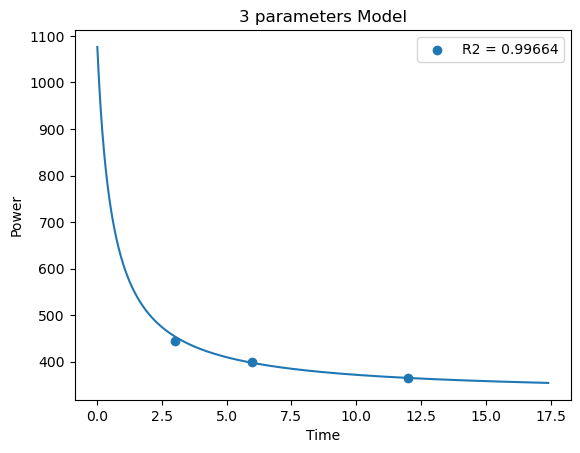

In [116]:
Times = np.array([t3, t6, t12]).reshape(-1, 1) 
Works = np.array([t3*P3, t6*P6, t12*P12])
Powers = np.array([P3, P6, P12])

# Define the exponential decay model
def t_3_model(P, CP, W_prime):
    return W_prime * (1/(P - CP) - 1/(Pmax - CP))

# Use curve_fit to fit the model to the data
params, covariance = curve_fit(t_3_model, Powers, Times.ravel(), p0=[300, 20000])

# Extract the fitted parameters
CP_3, W_3 = params

# Print the fitted parameters
print(f'Fitted CP: {round(CP_3,0)}')
print(f'Fitted W_prime: {round(W_3,0)}')


### R^2 of this model
predictions = [t_3_model(P, CP, W_3) for P in Powers]
r_squared = r2_score(Times, predictions)


### Recompute the curve
filtered_Power = np.array(Power_array)[np.array(Power_array) < Pmax]
time_predicted = np.array([t_3_model(P, CP, W_3) for P in filtered_Power])


plt.scatter(Times/60, Powers, label='R2 = '+str(np.round(r_squared,5)))
plt.plot(time_predicted/60,filtered_Power)
plt.xlabel('Time')
plt.ylabel('Power')
plt.title(f'3 parameters Model')
plt.legend()
plt.show()

## Comparison of the 2 models

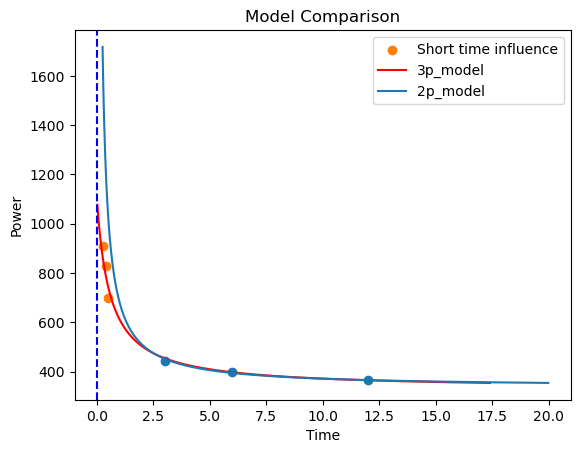

In [120]:
short_time = [15/60, 23/60, 30/60 ]
short_power = [911, 828,700]


plt.scatter(Times/60, Powers)
plt.scatter(short_time, short_power, label = 'Short time influence')
plt.plot(time_predicted/60,filtered_Power, label = '3p_model',color = 'r')
plt.plot(time_array/60, Power_array, label = '2p_model')
plt.axvline(0, linestyle = '--', color = 'b')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title(f'Model Comparison')
plt.legend()
plt.show()

## Difference come from short time

With the 3 parameters model

$$ t = \frac{W’}{P-CP} * \underbrace{\frac{P_{max}-P}{P_{max}-CP}}_{=\alpha} $$


Advantages:
- Power profile do not exceed Pmax
- For short period, the body is not capable to deplete all the W', so this reduce the Power theoretically reachable for a given short amount of time

Disadvantages:
- CP lower
- W' higher
- R2 slighlty less good

Also it has been shown that we could more or less approximate 
- CP as the Power that can be generated by the Aerobic System
- W' as the Grlycolitic + PCr System Capacity

But some studies has shown that W' is still impacted by a depletion in Oxygen, weakening the assumption that W' only represents the anaerobic capacity.
In the latest model with 3 parameters, the CP value is lower, and the W' value is even higher than for the 2 parameters Model. An even bigger proportion of the Aerobic capacity is therefore present in the W' term 


In practice, this component comes from the slow component to reach VO2max


#### Finally, last advantage is that the CP can't actually be hold for more than 30-40' in the first 2 parameters model. A lower value would allow one cyclist to hold this Power over a longer period in practice

The litterature says that for very short effort, no model are really precise because of the slow component of the various energy providing system.
But to build a satisfying Wbal model, we need a particular care on the 

## Let's build a Wbal model based on this model